<a href="https://colab.research.google.com/github/amaluvincent/Fake-News-Detection/blob/main/Fake_news_detection_NLP_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Setting up the environment

In [10]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk
!pip install tensorflow keras


# 2.Importing libraraies

In [11]:
# import necessary libabaries
import pandas as pd # For data manipulation and handling structured datasets.
import matplotlib.pyplot as plt  # For creating visualizations like plots and charts
import seaborn as sns  # For advanced and aesthetically pleasing visualizations.
import numpy as np  # For numerical computations and handling arrays/matrices.
from sklearn.pipeline import Pipeline  # For creating a pipeline of machine learning models.
from sklearn.feature_extraction.text import TfidfVectorizer # For combining tokenization, TF-IDF transformation, and vectorization .
from sklearn import feature_extraction, linear_model, model_selection # For feature engineering,linear model and model selection.
from sklearn.model_selection import train_test_split #For splitting data into test and train sets.
from sklearn import metrics # For evaluating the performance of machine learning models.
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix, classification_report  # For evaluating the performance.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings("ignore")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 3.Load dataset

In [12]:
# Load the ISOT dataset
true_news = pd.read_csv('/content/True.csv')
fake_news =  pd.read_csv('/content/Fake.csv')

# checking the size of each files
print('true:',true_news.shape)
print('fake:', fake_news.shape)


true: (21417, 4)
fake: (23481, 4)


In [13]:
# Display information about the true news dataset
print("True News Dataset Info:")
true_news.info()

# Display information about the fake news dataset
print("\nFake News Dataset Info:")
fake_news.info()


True News Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB

Fake News Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


# 4. Data cleaning and preparation

In [14]:
# Check for null values in each column of true_news and fake_news
print("Null values in True News dataset:")
print(true_news.isnull().sum())

print("\nNull values in Fake News dataset:")
print(fake_news.isnull().sum())


Null values in True News dataset:
title      0
text       0
subject    0
date       0
dtype: int64

Null values in Fake News dataset:
title      0
text       0
subject    0
date       0
dtype: int64


In [15]:
# Add a label to each dataframe
true_news['label'] = 0   # 0 for legitimate news
fake_news['label'] = 1   # 1 for fake news

# Combine both datasets
df = pd.concat([true_news, fake_news],ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)  # shuffle the data

# Print the combined dataset (first few rows)
print(df.head(5))
print(df.shape)



                                               title  \
0  JUDGE JEANINE RIPS DEMOCRATS: What Have Democr...   
1   Ted ‘Duck Hunter’ Cruz Goes Full Camo In BIZA...   
2  Yemen war needs a political solution: U.S. def...   
3   Here’s The Ted Cruz Ad Starring An Adult Film...   
4  Kremlin says it has no compromising dossier on...   

                                                text          subject  \
0  The truth is what you get with this judge! We ...  Government News   
1  Politicians have been known to do a lot of thi...             News   
2  RIYADH (Reuters) - A political solution throug...     politicsNews   
3  Ted Cruz s presidential campaign has pulled an...             News   
4  MOSCOW (Reuters) - The Kremlin said on Wednesd...     politicsNews   

                date  label  
0       Aug 21, 2016      1  
1   January 14, 2016      1  
2    April 17, 2017       0  
3  February 11, 2016      1  
4  January 11, 2017       0  
(44898, 5)


In [16]:
# Check for missing values after combined
print("Missing values in dataset:\n", df.isnull().sum())

Missing values in dataset:
 title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [17]:
# print dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


In [18]:
# Check for duplicate rows
duplicates = df.duplicated()

print("Duplicate Rows (True indicates duplicate):")
print(duplicates)


Duplicate Rows (True indicates duplicate):
0        False
1        False
2        False
3        False
4        False
         ...  
44893    False
44894    False
44895    False
44896    False
44897     True
Length: 44898, dtype: bool


In [19]:
# Removing unnecessary column(date)and (title)
df = df.drop(columns=["date", "title"])
print(df.head())

                                                text          subject  label
0  The truth is what you get with this judge! We ...  Government News      1
1  Politicians have been known to do a lot of thi...             News      1
2  RIYADH (Reuters) - A political solution throug...     politicsNews      0
3  Ted Cruz s presidential campaign has pulled an...             News      1
4  MOSCOW (Reuters) - The Kremlin said on Wednesd...     politicsNews      0


In [20]:
# Removing the word "Reuters" in the text
df['text'] = df['text'].str.replace('Reuters', '')
print(df.head())

                                                text          subject  label
0  The truth is what you get with this judge! We ...  Government News      1
1  Politicians have been known to do a lot of thi...             News      1
2  RIYADH () - A political solution through U.N.-...     politicsNews      0
3  Ted Cruz s presidential campaign has pulled an...             News      1
4  MOSCOW () - The Kremlin said on Wednesday it w...     politicsNews      0


In [21]:
# Define stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to calculate changes per preprocessing step
def analyze_preprocessing(text):
    if pd.isnull(text) or text.strip() == "":  # Handle NaN or empty string input
        return {
            'Lowercasing Change (%)': 0,
            'Non-Alpha Removed (%)': 0,
            'Stopwords Removed (%)': 0,
            'Lemmatization Changes (%)': 0,
            'Cleaned Text': ''
        }
    # Initial count of tokens
    original_tokens = word_tokenize(text)   # Tokenization
    total_tokens = len(original_tokens)

     # Check if there are no tokens, return 0 for all changes
    if total_tokens == 0:
        return {
            'Lowercasing Change (%)': 0,
            'Non-Alpha Removed (%)': 0,
            'Stopwords Removed (%)': 0,
            'Lemmatization Changes (%)': 0,
        }

    # Step-by-step preprocessing
    lowercased_text = text.lower()    # Lowercasing
    lowercased_tokens = word_tokenize(lowercased_text)    #Tokenization
    alphabetic_tokens = [word for word in lowercased_tokens if word.isalpha()]  #Remove non-alphabetic tokens
    non_stopword_tokens = [word for word in alphabetic_tokens if word not in stop_words]  # Stopword removal
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in non_stopword_tokens]    # Lemmatization

    # Calculate changes as percentages
    #total_tokens = len(original_tokens)
    lowercasing_change = 100 if any(word.isupper() for word in original_tokens) else 0
    non_alpha_removed = (len(lowercased_tokens) - len(alphabetic_tokens)) / total_tokens * 100 if total_tokens > 0 else 0
    stopword_removed = (len(alphabetic_tokens) - len(non_stopword_tokens)) / total_tokens * 100 if total_tokens > 0 else 0
    lemmatization_changes = sum(1 for orig, lemma in zip(non_stopword_tokens, lemmatized_tokens) if orig != lemma) / total_tokens * 100 if non_stopword_tokens else 0

     # Join the lemmatized tokens to form the cleaned text
    cleaned_text = ' '.join(lemmatized_tokens)

    return {
        'Lowercasing Change (%)': lowercasing_change,
        'Non-Alpha Removed (%)': non_alpha_removed,
        'Stopwords Removed (%)': stopword_removed,
        'Lemmatization Changes (%)': lemmatization_changes,
        'Cleaned Text': cleaned_text
    }

# Apply the analysis function to each text in the dataframe and create a new dataframe to store results
df[['Lowercasing Change (%)', 'Non-Alpha Removed (%)', 'Stopwords Removed (%)',
    'Lemmatization Changes (%)','cleaned_text']] = df['text'].apply(lambda x: pd.Series(analyze_preprocessing(x)))

# Display average percentages across all text entries
average_changes = df[['Lowercasing Change (%)', 'Non-Alpha Removed (%)',
                      'Stopwords Removed (%)', 'Lemmatization Changes (%)']].mean()
print("Average Changes across all texts:\n", average_changes)

Average Changes across all texts:
 Lowercasing Change (%)       94.683505
Non-Alpha Removed (%)        13.395659
Stopwords Removed (%)        37.051561
Lemmatization Changes (%)     5.635580
dtype: float64


In [22]:
# Print the original and cleaned text
print(df[['text','cleaned_text','Lowercasing Change (%)', 'Non-Alpha Removed (%)',
          'Stopwords Removed (%)', 'Lemmatization Changes (%)']].head(10))  # Display the first 10 rows

                                                text  \
0  The truth is what you get with this judge! We ...   
1  Politicians have been known to do a lot of thi...   
2  RIYADH () - A political solution through U.N.-...   
3  Ted Cruz s presidential campaign has pulled an...   
4  MOSCOW () - The Kremlin said on Wednesday it w...   
5  President Obama is widely expected to be an ex...   
6  Two weeks ago at Middlebury College, Charles M...   
7  The left showed its true colors last night wit...   
8  WELLINGTON/SYDNEY () - New Zealand Prime Minis...   
9  We all know that Donald Trump is a misogynisti...   

                                        cleaned_text  Lowercasing Change (%)  \
0    truth get judge love judge jeanine rip democrat                       0   
1  politician known lot thing get elected usually...                     100   
2  riyadh political solution negotiation needed r...                     100   
3  ted cruz presidential campaign pulled ad featu...           

In [23]:
# Check for NaN values in 'cleaned_text' after preprocessing
missing_values = df['cleaned_text'].isna().sum()
print(f"Number of NaN values in 'cleaned_text': {missing_values}")


Number of NaN values in 'cleaned_text': 0


# 5.Exploratory Data Analysis

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


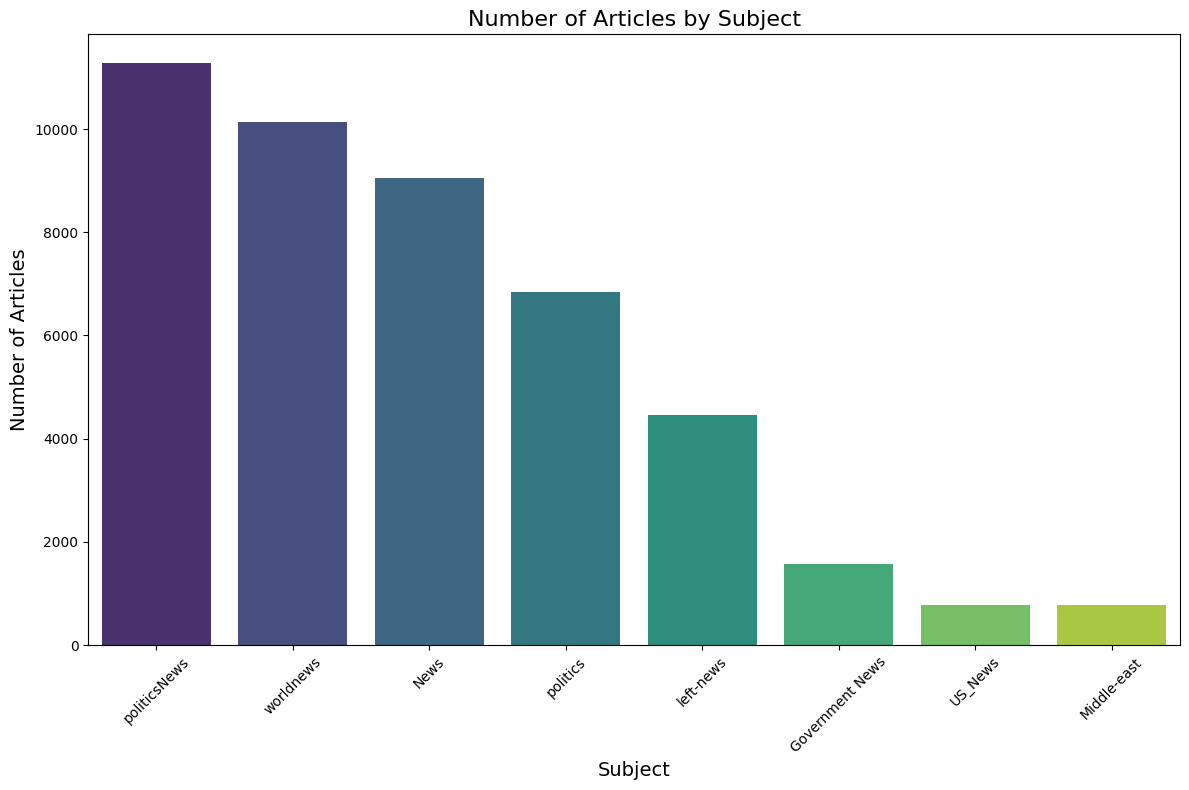

In [24]:
# Count the number of articles by subject
subject_counts = df['subject'].value_counts()
print(subject_counts)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')
plt.title('Number of Articles by Subject', fontsize=16)
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


label
1    23481
0    21417
Name: count, dtype: int64


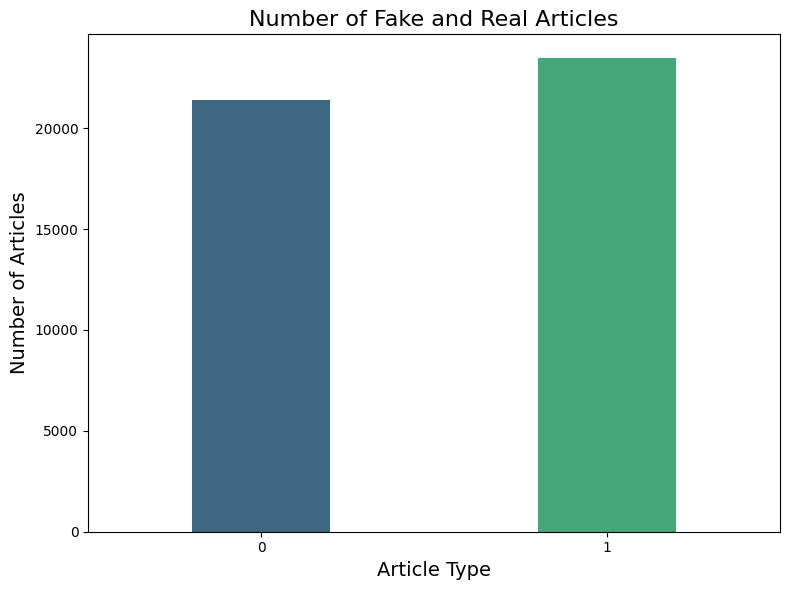

In [25]:
# How many fake and real articles?
article_counts = df['label'].value_counts()
print(article_counts)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=article_counts.index, y=article_counts.values,palette='viridis', width=0.4)
plt.title('Number of Fake and Real Articles', fontsize=16)
plt.xlabel('Article Type', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


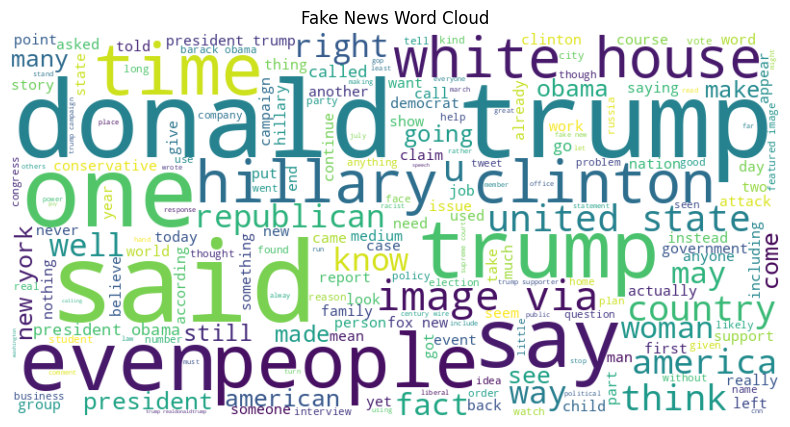

In [26]:
# Word cloud for fake news
fake_words = ' '.join(df[df['label'] == 1]['cleaned_text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word Cloud')
plt.show()

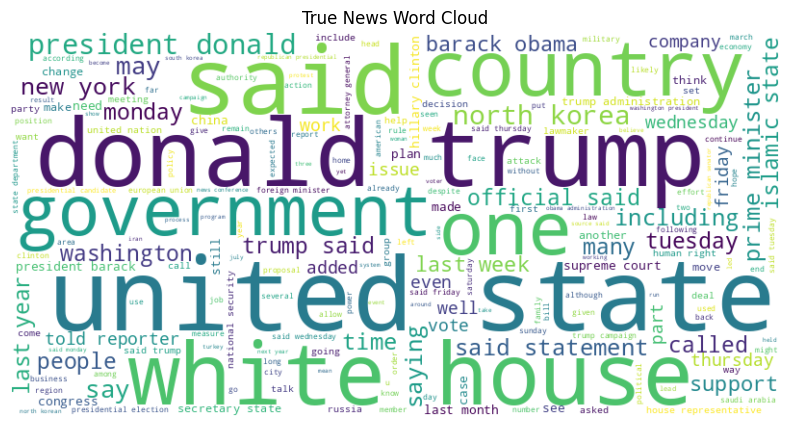

In [27]:
# Word cloud for true news

true_words = ' '.join(df[df['label'] == 0]['cleaned_text'])
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('True News Word Cloud')
plt.show()

Top 20 words in Fake News: [('trump', 74404), ('said', 31150), ('president', 26340), ('people', 26098), ('one', 23812), ('would', 23461), ('state', 22072), ('clinton', 18717), ('like', 18207), ('obama', 17920), ('time', 17885), ('donald', 17235), ('american', 16093), ('republican', 16061), ('say', 15528), ('also', 15243), ('year', 14844), ('new', 14198), ('news', 14198), ('u', 14173)]
Top 20 words in Real News: [('said', 99037), ('trump', 54280), ('state', 36243), ('would', 31526), ('president', 26939), ('republican', 22098), ('government', 19433), ('year', 18721), ('house', 16906), ('new', 16784), ('also', 15946), ('united', 15576), ('people', 15207), ('party', 14964), ('official', 14575), ('told', 14244), ('country', 13948), ('election', 13910), ('could', 13709), ('one', 13025)]


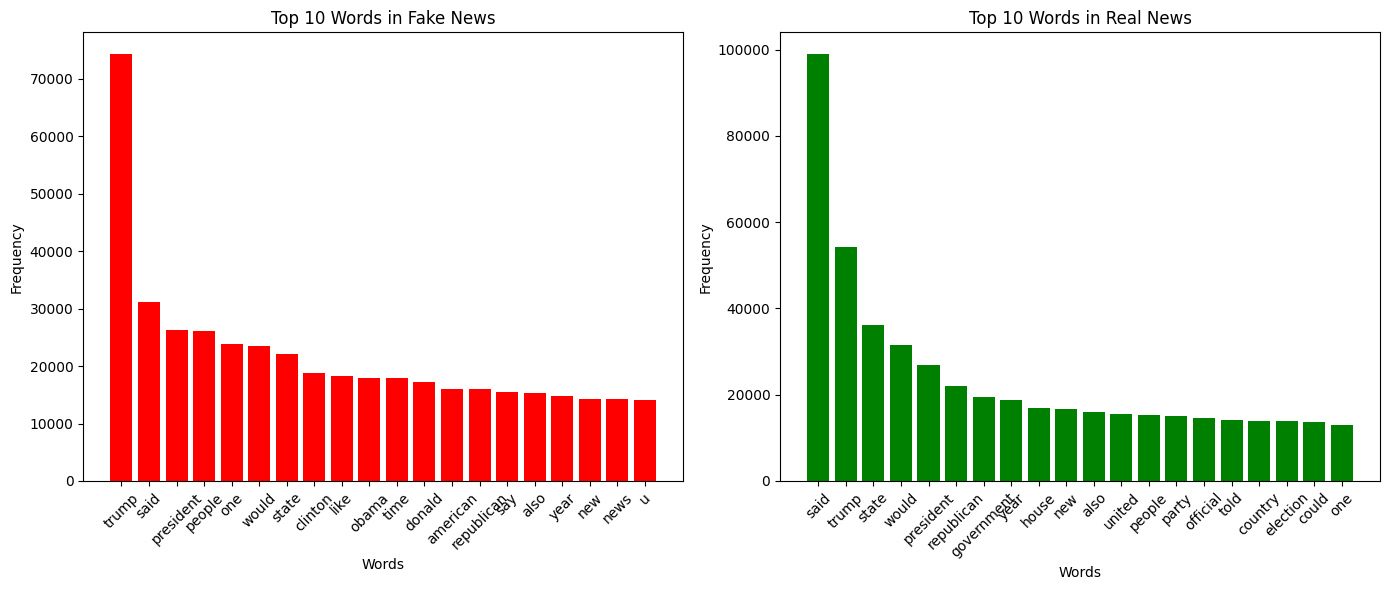

In [28]:
# Most  frequent words counter
# Fake News Word Frequency
fake_words = ' '.join(df[df['label'] == 1]['cleaned_text']).split()
counter_fake = Counter(fake_words)  # counting word frequency
top_fake = counter_fake.most_common(20)
print("Top 20 words in Fake News:", counter_fake.most_common(20))

# Real News Word Frequency
real_words = ' '.join(df[df['label'] == 0]['cleaned_text']).split()
counter_real = Counter(real_words)
top_real = counter_real.most_common(20)
print("Top 20 words in Real News:", counter_real.most_common(20))

# Unpack the top words and their counts for fake and real news
fake_words_list, fake_counts = zip(*top_fake)
real_words_list, real_counts = zip(*top_real)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Fake News Plot
axes[0].bar(fake_words_list, fake_counts, color='red')
axes[0].set_title('Top 10 Words in Fake News')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(fake_words_list, rotation=45)

# Real News Plot
axes[1].bar(real_words_list, real_counts, color='green')
axes[1].set_title('Top 10 Words in Real News')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].set_xticklabels(real_words_list, rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

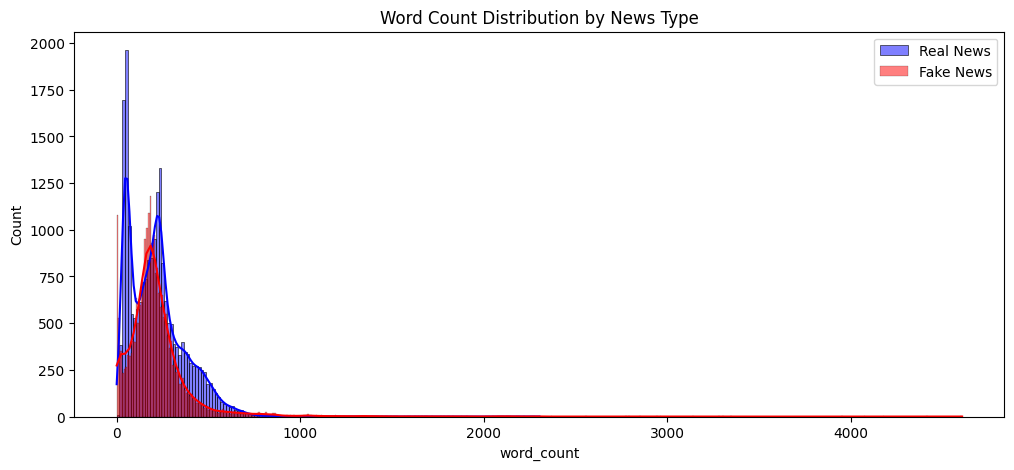

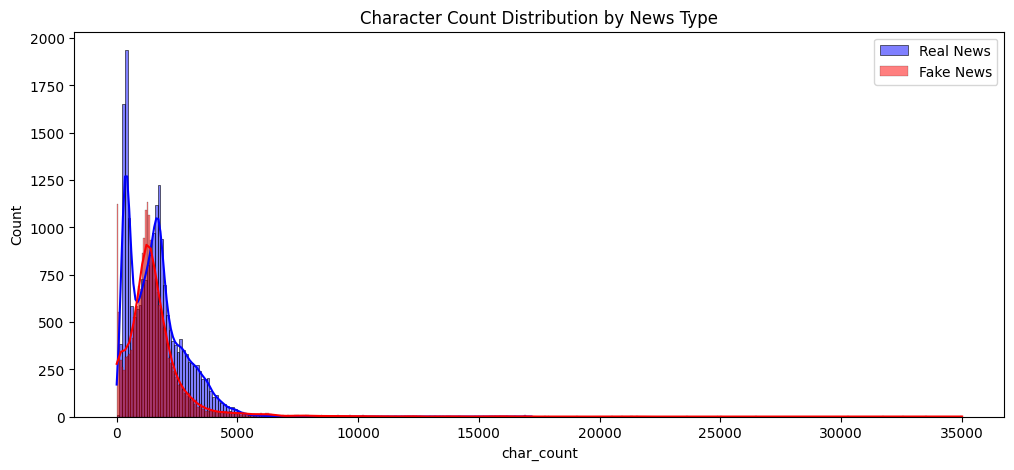

In [29]:
# Word count and sentence length analysis
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['cleaned_text'].apply(len)

# Visualize word and character count distributions
plt.figure(figsize=(12, 5))
sns.histplot(df[df['label'] == 0]['word_count'], color='blue', label='Real News', kde=True)
sns.histplot(df[df['label'] == 1]['word_count'], color='red', label='Fake News', kde=True)
plt.title("Word Count Distribution by News Type")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df[df['label'] == 0]['char_count'], color='blue', label='Real News', kde=True)
sns.histplot(df[df['label'] == 1]['char_count'], color='red', label='Fake News', kde=True)
plt.title("Character Count Distribution by News Type")
plt.legend()
plt.show()

# 6.Training & Testing Data

In [30]:
X = df['cleaned_text']
y = df['label']

# Check for duplicates in the input features
print(f"Number of duplicate rows in X: {X.duplicated().sum()}")

# Check for duplicates in the combination of X and y (to consider label alignment)
data = pd.DataFrame({'X': X, 'y': y})
print(f"Number of duplicate rows in combined X and y: {data.duplicated().sum()}")


Number of duplicate rows in X: 6468
Number of duplicate rows in combined X and y: 6467


In [32]:
# Combine X and y into a single DataFrame
data = pd.DataFrame({'X': X, 'y': y})

# Drop duplicates based on both features and labels
data = data.drop_duplicates()

# Separate the cleaned data back into X and y
X = data['X']
y = data['y']

# Print the number of duplicates after cleaning
print(f"Number of duplicate rows in X after cleaning: {X.duplicated().sum()}")
print(f"Number of duplicate rows in combined X and y after cleaning: {data.duplicated().sum()}")


Number of duplicate rows in X after cleaning: 0
Number of duplicate rows in combined X and y after cleaning: 0


In [33]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (30744,)
y_train shape: (30744,)
X_test shape: (7686,)
y_test shape: (7686,)


In [34]:
# Check for overlap between training and testing datasets
common_samples = np.intersect1d(X_train, X_test)
print(f"Number of overlapping samples between train and test: {len(common_samples)}")

# Confirm stratification by comparing class distributions
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

Number of overlapping samples between train and test: 0
Class distribution in training set:
y
0    0.547391
1    0.452609
Name: proportion, dtype: float64

Class distribution in testing set:
y
0    0.547359
1    0.452641
Name: proportion, dtype: float64


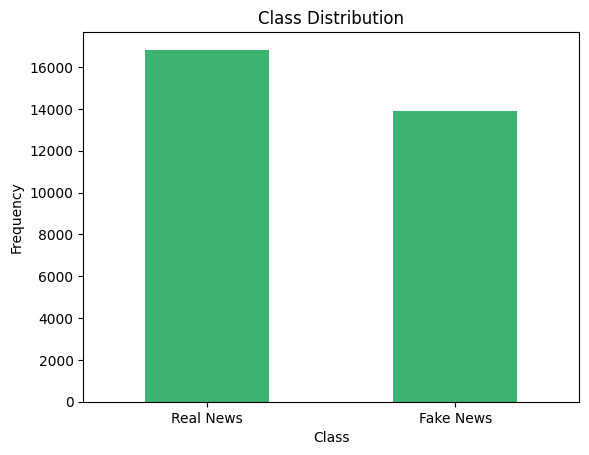

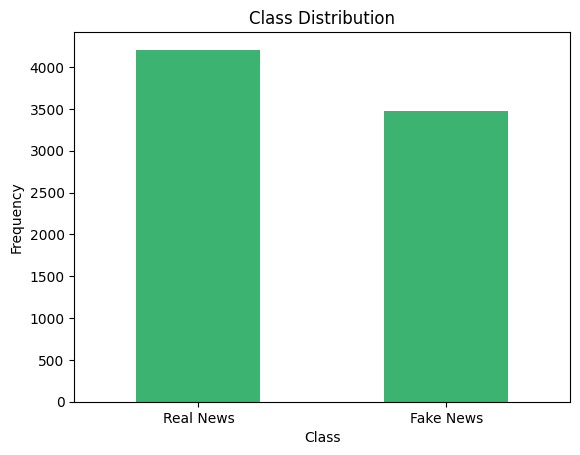

In [35]:
# Evaluate class distribution of y_train and y_test
# Plot class distribution
def plot_class_distribution(y):
    y.value_counts().plot(kind='bar', color='mediumseagreen')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.xticks(ticks=[0, 1], labels=['Real News', 'Fake News'], rotation=0)
    plt.show()

# Plot class distribution for training and test sets
plot_class_distribution(y_train)
plot_class_distribution(y_test)

# 7. Feature Extraction
This part of the code deals with converting the text data (news articles) into a numerical format that machine learning models can understand. This process is called feature extraction. The specific technique used here is called TF-IDF (Term Frequency-Inverse Document Frequency).

1)tf (term frequency):-which counts the number of time a particular words is repearting in a documents.

2)idf (inverse document frequency):-Measure the word is a rare word or common word in a document

In [36]:
vectorization = TfidfVectorizer(max_features=10000,ngram_range=(1,2))
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

In [37]:
print("Vocabulary size:", len(vectorization.vocabulary_))


Vocabulary size: 10000


# 8. Model Training & Evaluation

In [38]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=classes, yticklabels=classes, cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


### Logistic Regression:
A supervised machine learning algorithm widely used for binary classification tasks.Logistic regression is used to predict the categorical dependent variable. It's used when the prediction is categorical, for example, yes or no, true or false, 0 or 1

In [40]:
Log_reg = LogisticRegression(random_state=42, solver='liblinear', C=1.0, penalty='l2')
Log_reg.fit(xv_train, y_train) # training
pred_lr = Log_reg.predict(xv_test)
log_reg_score = Log_reg.score(xv_test, y_test)
print("Logistic Regression Score:", log_reg_score)

Logistic Regression Score: 0.9813947436898257



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4207
           1       0.99      0.97      0.98      3479

    accuracy                           0.98      7686
   macro avg       0.98      0.98      0.98      7686
weighted avg       0.98      0.98      0.98      7686



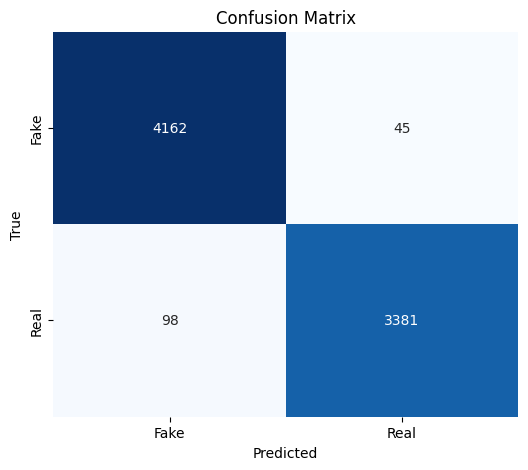

In [41]:

print("\nLogistic Regression Classification Report:")
print (classification_report(y_test, pred_lr))
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])



# Decision Tree Classifier
A Decision Tree Classifier is a type of algorithm that uses a tree-like structure to classify instances based on their feature values

In [42]:
Dec_tre = DecisionTreeClassifier(random_state=42, max_depth=10, criterion='entropy')
Dec_tre.fit(xv_train, y_train)
pred_dt = Dec_tre.predict(xv_test)
Dec_tre.score(xv_test, y_test)

0.9215456674473068

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4207
           1       0.94      0.89      0.91      3479

    accuracy                           0.92      7686
   macro avg       0.92      0.92      0.92      7686
weighted avg       0.92      0.92      0.92      7686



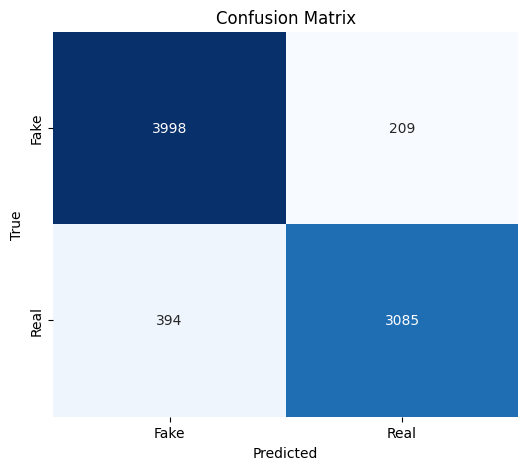

In [43]:

print (classification_report(y_test, pred_dt))
cm = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Random Forest
 A machine learning technique that uses a collection of decision trees to solve problems like classification and regression:
The algorithm creates many decision trees, each trained with a different random noise. The output of the random forest is the class or value that most of the trees select.

In [44]:
Rand_for = RandomForestClassifier(random_state = 42, n_estimators=100, max_depth=20)
Rand_for.fit(xv_train, y_train)
pred_rf = Rand_for.predict(xv_test)
Rand_for.score(xv_test, y_test)

0.9647410876919074

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4207
           1       0.99      0.93      0.96      3479

    accuracy                           0.96      7686
   macro avg       0.97      0.96      0.96      7686
weighted avg       0.97      0.96      0.96      7686



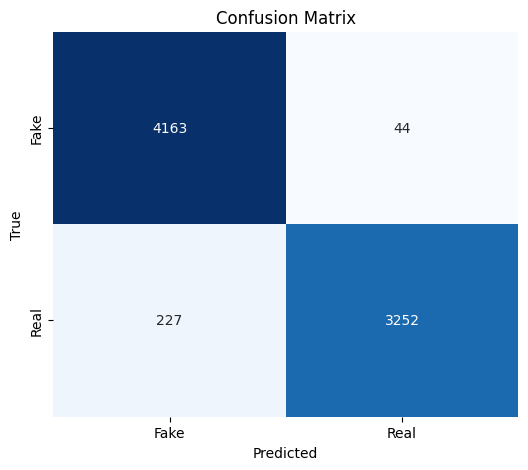

In [45]:
print (classification_report(y_test, pred_rf))
cm = metrics.confusion_matrix(y_test, pred_rf)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

NAive Bayes

In [47]:
Naive_bay = MultinomialNB(alpha=0.1)
Naive_bay.fit(xv_train, y_train)
pred_nb = Naive_bay.predict(xv_test)
Naive_bay.score(xv_test, y_test)

0.9475670049440541

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4207
           1       0.94      0.95      0.94      3479

    accuracy                           0.95      7686
   macro avg       0.95      0.95      0.95      7686
weighted avg       0.95      0.95      0.95      7686



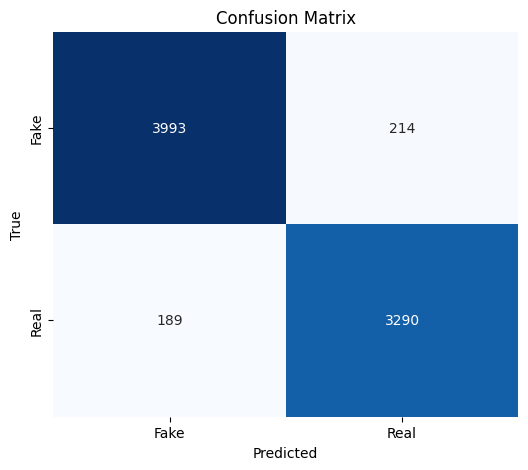

In [48]:
print(classification_report(y_test, pred_nb))
cm = metrics.confusion_matrix(y_test, pred_nb)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# LSTM

In [52]:
# Preparing data for LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_words = 10000
max_len = 150
embedding_dim = 50

In [53]:
# Tokenizing the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert the training and test texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [54]:
# Padding sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


In [55]:
# LSTM Model
model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [56]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
# Train the LSTM model
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test)
)

Epoch 1/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.9260 - loss: 0.2071 - val_accuracy: 0.9783 - val_loss: 0.0785
Epoch 2/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9822 - loss: 0.0594 - val_accuracy: 0.9805 - val_loss: 0.0667
Epoch 3/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9911 - loss: 0.0285 - val_accuracy: 0.9818 - val_loss: 0.0701
Epoch 4/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9971 - loss: 0.0112 - val_accuracy: 0.9722 - val_loss: 0.1246
Epoch 5/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.9938 - loss: 0.0185 - val_accuracy: 0.9757 - val_loss: 0.1092
Epoch 6/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9975 - loss: 0.0091 - val_accuracy: 0.9722 - val_loss: 0.1210
Epoch 7/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.9989 - loss: 0.0039 - val_accuracy: 0.9670 - val_loss: 0.1326
Epoch 8/10
961/961 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.9963 - loss: 0.0101 - 

In [58]:
# Evaluate the LSTM model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("\nLSTM Model Accuracy:", accuracy)

241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9737 - loss: 0.1223

LSTM Model Accuracy: 0.9755399227142334


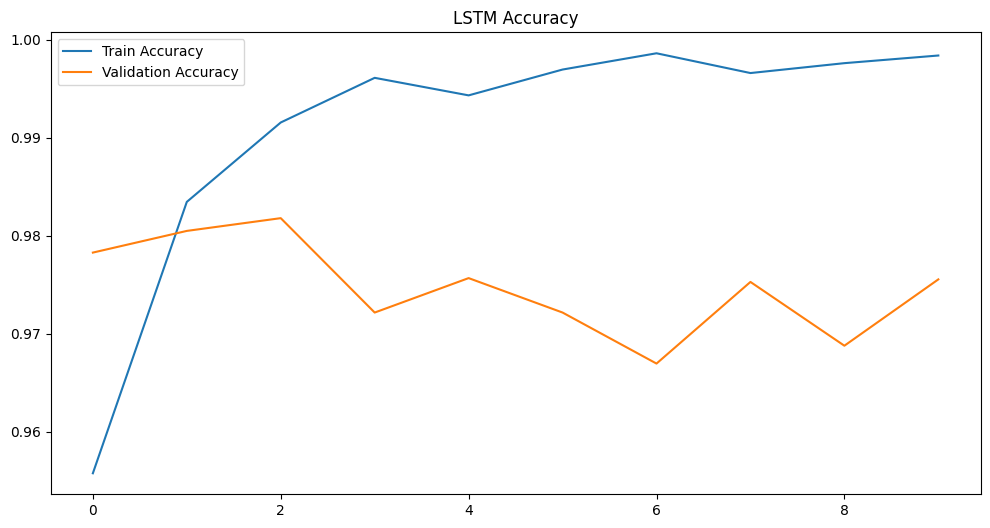

In [59]:
# Plotting training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy')
plt.legend()
plt.show()

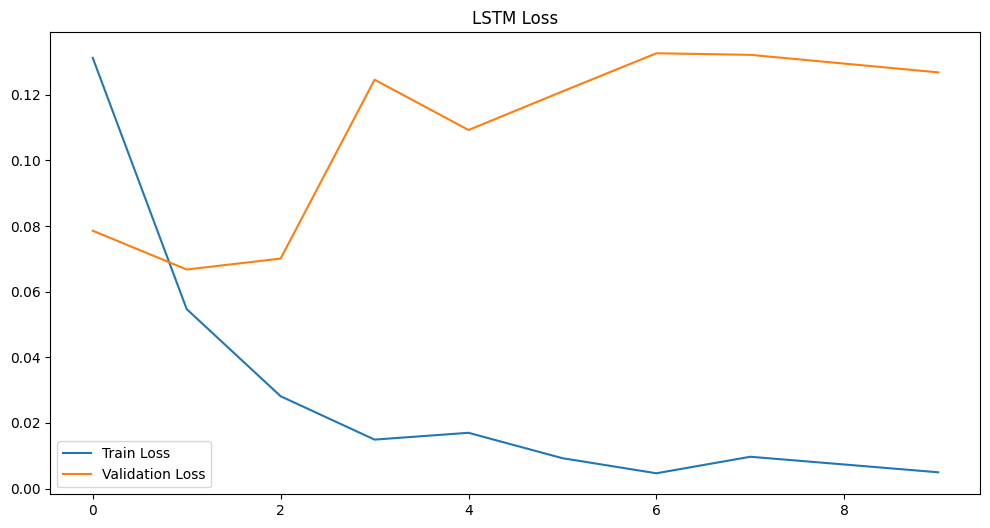

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss')
plt.legend()
plt.show()

# Model Testing with Manual Entry

In [ ]:
def output_lable(n):
    if n==0:
        return "True News"
    elif n==1:
        return "Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt) # preprocessing
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)# feature extraction into numerical features
    pred_lr = LogisticRegression.predict(new_xv_test)# model prediction
    pred_dt = DecisionTreeClassifier.predict(new_xv_test)
    pred_rf = RandomForestClassifier.predict(new_xv_test)
    pred_nb = NaiveBayesClassifier.predict(new_xv_test)
    return print("\n\nLR Predicition: {} \nDT Prediction: {} \nRF Prediction: {}  \nNB Prediction:{}".format(output_lable(pred_lr[0]),
                                                                                                             output_lable(pred_dt[0]),
                                                                                                             output_lable(pred_rf[0]),
                                                                                                             output_lable(pred_nb[0])))

In [ ]:
news = str(input())
manual_testing(news)


BREAKING NEWS: Scientists Confirm Earth Will Go Dark for Six Days Next Month Date: November 25, 2024  In an unprecedented announcement, NASA has confirmed that Earth will experience six days of total darkness from December 16 to December 21 due to a rare astronomical event. Scientists are calling this phenomenon a "Cosmic Blackout," which is reportedly caused by a massive alignment of Jupiter and Venus.  According to NASA spokesperson Dr. Alan Morris, "The alignment will generate an astronomical dust cloud, blocking 90% of sunlight from reaching Earth. While there is no immediate danger to human health, this event will disrupt the natural circadian rhythms of life on the planet."  Governments worldwide have urged citizens to prepare by stocking up on essential supplies. Social media is already abuzz with reactions, ranging from excitement to panic. Experts have advised staying calm and using this opportunity for reflection and reconnection with loved ones.  Stay tuned for more updates 

In [ ]:
news = str(input())
manual_testing(news)


MOSCOW (Reuters) - Russiaâ€™s former ambassador to Washington, Sergei Kislyak, said on Saturday his conversations with former White House national security adviser Michael Flynn had been transparent and focused on matters of U.S.-Russia cooperation. Kislyak ended his tenure in Washington in July but remains a key figure in ongoing U.S. investigations into Moscowâ€™s alleged meddling in the 2016 presidential election. Flynn was forced to resign in February after it became known that he had failed to disclose the content of conversations he had with Kislyak and misled U.S. Vice-President Mike Pence about their meetings. â€œWe only spoke about the most simple things ... but the communication was completely correct, calm, absolutely transparent. In any case, there were no secrets on our side,â€ Kislyak said during a panel discussion on Russian television. â€œThere are a number of issues which are important for cooperation between Russia and the United States - most of all, terrorism. And 